In [1]:
%pip install geopandas;
%pip install descartes;
%pip install shapely;
%pip install hide_code;

import pandas as pd;
import geopandas;
import math
import matplotlib.pyplot as plt;
from descartes import PolygonPatch;
from shapely.geometry import Point;

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.DataFrame(
    {
        'City': ['Ratingen','Bonn', 'Hamburg', 'BSA'],
        'Stamm': ['Hratuga', 'Wikinger', 'PBN', 'Mittelerde'],
        'Count': [200, 50, 100, 200],
        'Latitude': [5684908.022, 5622351.428, 5934036.266, 5680344.628],
        'Longitude': [353134.830, 365805.050, 565833.195, 568371.802]
    }
)

print(df)

       City       Stamm  Count     Latitude   Longitude
0  Ratingen     Hratuga    200  5684908.022  353134.830
1      Bonn    Wikinger     50  5622351.428  365805.050
2   Hamburg         PBN    100  5934036.266  565833.195
3       BSA  Mittelerde    200  5680344.628  568371.802


In [3]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude)
)

import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in df.iterrows():
    latitude = coord.Latitude * coord.Count
    longitude = coord.Longitude * coord.Count

    x += latitude
    y += longitude

total = len(df)

x = x / (df['Count'].sum())
y = y / (df['Count'].sum())


mean_location = {
    'latitude': x,
    'longitude': y
    }
# print(mean_location)

In [4]:
# print(gdf.head())

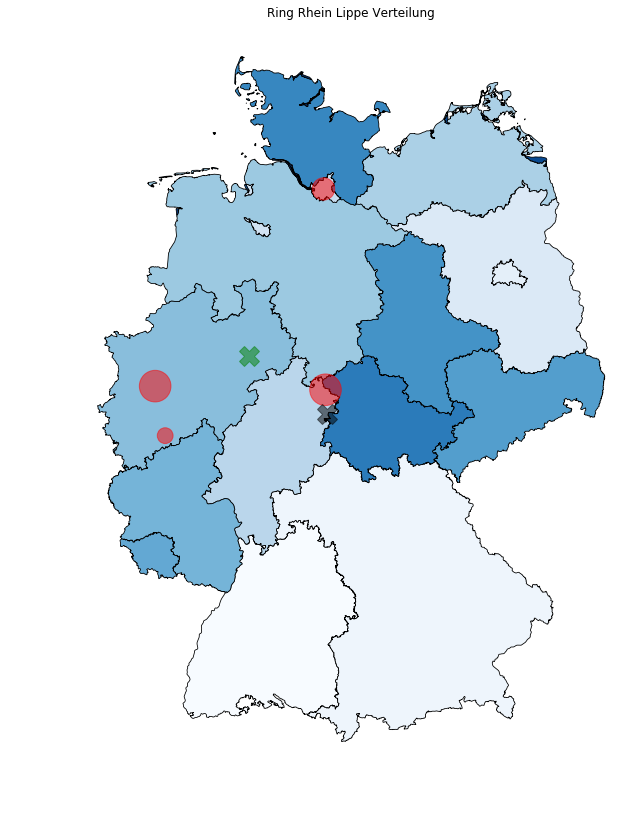

In [5]:
germany = geopandas.read_file('maps_germany/250_NUTS1.shp')
# print(germany)

burg_location = {
    'latitude': 5650300,
    'longitude': 570168
    }
germany = germany.simplify(0.9)

plt.rcParams['figure.figsize'] = [10, 20]

ax = germany.plot(
    cmap='Blues',
    linewidth = 0.8,
    edgecolor='black',
    # facecolor='lightgrey'
);



# We can now plot our ``GeoDataFrame``.
gdf.plot(
    color = 'red',
    marker = 'o',
    alpha = 0.5,
    ax=ax,
    markersize = df['Count'] * 5,
)
plt.title('Ring Rhein Lippe Verteilung')
ax.set_xlabel('time [s]')
ax.set_ylabel('signal')
ax.set_axis_off()

plt.plot(mean_location['longitude'], mean_location['latitude'], 'gX', markersize = 20, alpha = 0.5)
plt.plot(burg_location['longitude'], burg_location['latitude'], 'kX', markersize = 20, alpha = 0.5) # Burg Ludwigstein

plt.show()

In [7]:
# 2000 Kg sparen durch vegan
KgCo2PerLiterFuel = 2.37# je 1 Liter 2,37 Kg C02
fuelPerKm = 6/100 # 6 Liter pro 100 Km

savedCo2PerYear = 2000 # save C02 Kg due vegan per year
print(savedCo2PerYear)
savedCo2PerWeekend = savedCo2PerYear * 2 / 365 # save C02 Kg due vegan per weekend
print(savedCo2PerWeekend)
savedFuelPerWeekend = savedCo2PerWeekend / KgCo2PerLiterFuel # save fuel in liter due vegan per weekend
print(savedFuelPerWeekend)
savedKmPerWeekend = int(savedFuelPerWeekend / fuelPerKm) # saved car-km due vegan per weekend

print('saved car-km due vegan per weekend')
print(savedKmPerWeekend)

2000
10.95890410958904
4.62401017282238
saved car-km due vegan per weekend
77


In [8]:
def calculate_area_center(list):
    x_start = list['Latitude']
    y_end = list['Longitude']

    y_center = mean_location['longitude']
    x_center = mean_location['latitude']

    x_diff = abs(x_center) - abs(x_start)
    y_diff = abs(y_center) - abs(y_end)
    
    a = abs(x_diff)
    b = abs(y_diff)
    
    c = math.sqrt(a**2 + b**2)
    return int(c/1000)

def calculate_area_burg(list):
    x_start = list['Latitude']
    y_end = list['Longitude']

    y_center = burg_location['longitude']
    x_center = burg_location['latitude']

    x_diff = abs(x_center) - abs(x_start)
    y_diff = abs(y_center) - abs(y_end)
    
    a = abs(x_diff)
    b = abs(y_diff)
    
    c = math.sqrt(a**2 + b**2)
    return int(c/1000)

gdf['distance_center'] = gdf.apply(calculate_area_center, axis=1)
gdf['distance_burg'] = gdf.apply(calculate_area_burg, axis=1)

In [9]:
def sum_km_center(list):
    a = list['Count']
    b = list['distance_center']

    return a*b

def sum_km_burg(list):
    a = list['Count']
    b = list['distance_burg']

    return a*b

gdf['distance_center_sum'] = gdf.apply(sum_km_center, axis=1)
print(gdf[[ 'Stamm','distance_center_sum']])
print('Summe zum Mittelpunkt')
print(gdf['distance_center_sum'].sum())

gdf['distance_burg_sum'] = gdf.apply(sum_km_burg, axis=1)
print(gdf[[ 'Stamm','distance_burg_sum']])
print('Summe zur Burg')
print(gdf['distance_burg_sum'].sum())
print('Sparen durch Vegan:')
print(gdf['Count'].sum() * savedKmPerWeekend)

        Stamm  distance_center_sum
0     Hratuga                24800
1    Wikinger                 7250
2         PBN                23100
3  Mittelerde                21200
Summe zum Mittelpunkt
76350
        Stamm  distance_burg_sum
0     Hratuga              43800
1    Wikinger              10300
2         PBN              28300
3  Mittelerde               6000
Summe zur Burg
88400
Sparen durch Vegan:
42350
